PART 2 - Brach. test

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')
titanic_data.columns = pd.Series(titanic_data.columns).apply(lambda r: r.lower())
titanic_data.sex = titanic_data.sex.map({'female': 0, 'male': 1})
titanic_data.head()#[-2::]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.columns = pd.Series(test.columns).apply(lambda r: r.lower())
test.sex = test.sex.map({'female': 0, 'male': 1})
test['survived']=[-1]*len(test)

cols=list(test)
cols.insert(0,cols.pop(cols.index('survived')))
test=test.ix[:,cols]

test.head(2)

C:\Users\Dima\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
892,-1,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
893,-1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S


In [4]:
raw=pd.concat([titanic_data,test],)

In [5]:
raw

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
survived    1309 non-null int64
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null int64
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 122.7+ KB


In [7]:
raw.age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [8]:
age_table=raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='mean')
age_table

survived           -1          0          1
sex pclass                                 
0   1       41.333333  25.666667  34.939024
    2       24.376552  36.000000  28.080882
    3       23.073400  23.818182  19.329787
1   1       40.520000  44.581967  36.248000
    2       30.940678  33.369048  16.022000
    3       24.525104  27.255814  22.274211

In [9]:
raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='count')

survived    -1    0   1
sex pclass             
0   1       48    3  82
    2       29    6  68
    3       50   55  47
1   1       50   61  40
    2       59   84  15
    3       96  215  38

<Container object of 65 artists>

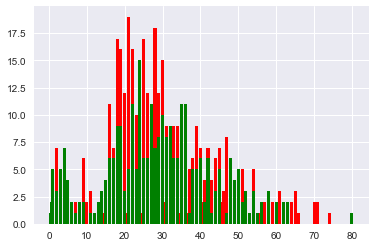

In [10]:
f1=raw[raw.survived==1].groupby(['age']).name.count()
f2=raw[raw.survived==0].groupby(['age']).name.count()
#pd.DataFrame(f1)

plt.bar(f2.index,f2,color='red')
plt.bar(f1.index,f1,color='green')


In [11]:
print raw[raw.name.str.contains('Miss')].age.mean()
print raw[raw.name.str.contains('Mrs.')].age.mean()
print raw[raw.name.str.contains('Mr.')].age.mean()
miss_age =raw[raw.name.str.contains('Miss')].age.mean()

21.7742380952
36.8045977011
33.3220899471


In [12]:
raw.age=raw.age.fillna(-1)
#raw.age=raw.age.fillna(29)
raw.cabin = raw.cabin.fillna('na') # не будем использовать
raw.embarked= raw.embarked.fillna('S') # либо С, т.к. это только пассажиры первого класса
raw.fare = raw.fare.fillna(raw.fare.mean())

test.age = test.age.fillna(-1)
test.cabin = test.cabin.fillna('na')
test.embarked= test.embarked.fillna('S')

In [13]:
miss_index = raw[raw.name.str.contains('Miss')][raw.age==-1].index
print len(miss_index)
for ind in miss_index:
    raw.loc[ind,'age']=miss_age
    
na_index =raw[raw.age==-1].index 
for ind in na_index:
    raw.loc[ind,'age']=age_table[raw.loc[ind].survived][raw.loc[ind].sex][raw.loc[ind].pclass]


C:\Users\Dima\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


50


In [14]:
raw.age.describe()

count    1309.000000
mean       29.346071
std        13.235190
min         0.170000
25%        21.774238
50%        27.255814
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [16]:
tmp =raw.loc[:,['survived','cabin']]
tmp['cab']=tmp.cabin.str[0]
tmp.pivot_table(index=['cab'],columns='survived', values='cabin',aggfunc='count')

survived,-1,0,1
cab,,,
A,7.0,8.0,7.0
B,18.0,12.0,35.0
C,35.0,24.0,35.0
D,13.0,8.0,25.0
E,9.0,8.0,24.0
F,8.0,5.0,8.0
G,1.0,2.0,2.0
T,NaN,1.0,NaN
n,327.0,481.0,206.0


In [34]:
train_ind = list(raw[raw.survived!=-1].index)
kaggle_ind = list(raw[raw.survived==-1].index)

In [70]:
num_data = raw[['pclass','sex', 'age','sibsp', 'parch','fare']]
cat_data = raw[['cabin','embarked']].drop(['cabin'],axis=1)
y=raw[raw.survived!=-1]['survived']
cat_data.head(2)

,embarked
PassengerId,
1,S
2,C


In [62]:
train_num_data=num_data.loc[train_ind,]
kagg_num_data = num_data.drop(train_ind,axis=0)

train_cat_data=cat_data.loc[train_ind,]
kagg_cat_data = cat_data.drop(train_ind,axis=0)


In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [103]:
scaler = StandardScaler()
transform = PolynomialFeatures(1)
encoder = DV(sparse = False)


scaler.fit(train_num_data,y)
X_s=train_num_data#scaler.transform(train_num_data)
kag_X_s =kagg_num_data# scaler.transform(kagg_num_data)

X_cat= encoder.fit_transform(train_cat_data.T.to_dict().values())
kag_cat = encoder.fit_transform(kagg_cat_data.T.to_dict().values())

X_s=np.hstack([X_s,X_cat])
kagg_X_s = np.hstack([kag_X_s,kag_cat])

#X_s = transform.fit_transform(X_s)
#kagg_X_s = transform.transform(kagg_X_s)
#pd.DataFrame(X)


X=X_s
pd.DataFrame(kagg_X_s).head(2)

,0,1,2,3,4,5,6,7,8
0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0


In [119]:
lg=[]
xg=[]
rf=[]
for i in range(0,1):    
    (X_train,
    X_test,
    y_train,
    y_test)=train_test_split(X,y,test_size=0.3,stratify=y)

    xgb = XGBClassifier()
    xgb.fit(X_train,y_train)

    LG = LogisticRegression(class_weight='balanced',fit_intercept=False, penalty='l1')
    LG.fit(X_train,y_train)
    
    RF = RandomForestClassifier(n_estimators=70,max_depth=15)
    RF.fit(X_train,y_train)
    
    lg.append(roc_auc_score(y_test,LG.predict(X_test)))
    xg.append(roc_auc_score(y_test,xgb.predict(X_test)))
    rf.append(roc_auc_score(y_test,RF.predict(X_test)))
    #print lg


print ' LG : mean {}, max {}, min {} '.format(mean(lg),max(lg),min(lg))#roc_auc_score(y_test,LG.predict(X_test)))
print ' XGB :mean {}, max {}, min {} '.format(mean(xg),max(xg),min(xg))#roc_auc_score(y_test,xgb.predict(X_test)))
print ' RF :mean {}, max {}, min {} '.format(mean(rf),max(rf),min(rf))#roc_auc_score(y_test,xgb.predict(X_test)))

 LG : mean 0.817475728155, max 0.817475728155, min 0.817475728155 
 XGB :mean 0.838040600177, max 0.838040600177, min 0.838040600177 
 RF :mean 0.844130626655, max 0.844130626655, min 0.844130626655 


In [106]:
pd.DataFrame(kagg_X_s).head(4)

,0,1,2,3,4,5,6,7,8
0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0


In [107]:
answers = pd.DataFrame(xgb.predict(kagg_X_s))
answers.columns=['survived']
answers.index = test.index
answers.head(4)

,survived
PassengerId,
892,0
893,0
894,0
895,0


In [108]:
answers.to_csv('answer.csv')

In [55]:
print raw.columns
pd.DataFrame(LG.coef_)


Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9
0,-0.001603,-0.988829,-1.222348,-0.656641,-0.382602,-0.085839,0.087567,0.116095,-0.021254,-0.242308
